<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Trabalho 1: Recognizing Iris flowers using MLPs

### Aluno: Rafael Heitor Correia de Melo
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
$\newcommand{\vec}[1]{\boldsymbol{#1}}$

# Enunciado passado

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimetres. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris setosa
      <img src='imgs/05/iris_setosa.jpg'/>
      </div></div>
      <div class='col-md-4' align='center'><div class="well well-sm">
      Iris versicolor
      <img width='86.5%'src='imgs/05/iris_versicolor.jpg'/>
      </div></div>
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris virginica
      <img src='imgs/05/iris_virginica.jpg' width='80%'/>
      </div></div>
  </div>
</div>

## Primeiro criando as funções de ativação e suas derivadas 
* Criei as funções identidade, tangente hiperbólica e logistica conforme descritas no material do curso.

In [235]:
import numpy as np

# Funções de ativação
def identity(x):
    return x

def tanh(x):
    return np.tanh(x)

def logistic(x):
    return 1/(1 + np.exp(-x))

# Derivadas das funções de ativação
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

def identity_derivative(x):
    return 1

## Implementação de uma rede Perceptron multi-camadas
Como parâmetros estão definidos:
* o número de camadas/quantidade de neurônios em cada camada
* a função de ativação a ser usada no treinamento
* a taxa de aprendizado (alpha)
* o número de épocas
* inseri um multiplicador a ser aplicado para o valores dos pesos para limitar o valor máximo do peso

Para divisão dos valores entre treino, validação e teste usei: 
 * 60% para treino
 * 20% para validação
 * 20% para teste
 
A função **learn** retorna os erros de treino e validação.

In [239]:
class RafaelMeloMLP():
    
    def __init__(self, params=None):
        'If params is None the MLP is initialized with default values.'
        if params == None:
            self.params = {'layers':[4,14,8,3], 'activation': 'tanh', 'alpha': 0.1, 'epochs' :100, 'maxWeight': 0.05}
        else:
            self.params = params
            
        if self.params['activation'] == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif self.params['activation'] == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif self.params['activation'] == 'identity':
            self.activation = identity
            self.activation_deriv = identity_derivative
        
        self.layers = self.params['layers']
        maxWeight = self.params['maxWeight']
        self.weights = []
        # somente inicializa os pesos para as camadas ocultas (primeira é de entrada e última de saída)
        for i in range(1, len(self.layers) - 1):
            # incializa para a matriz do número de neurônios entre a camada anterior e a atual + bias
            self.weights.append(np.random.random((self.layers[i - 1] + 1, self.layers[i] + 1))* maxWeight)
        # pesos das conexões da última camada oculta com a camada de saída
        self.weights.append(np.random.random((self.layers[i] + 1, self.layers[i + 1]))* maxWeight)
        
        self.epochs = self.params['epochs']
        self.alpha = self.params['alpha']
        
    def propagate(self, X):
        predictions = []
        for x in X:
            x = np.array(x)
            temp = np.ones(x.shape[0]+1)
            temp[0:-1] = x  # adicionando o bias na camada de entrada
            a = temp
            for l in range(0, len(self.weights)):
                a = self.activation(np.dot(a, self.weights[l]))
                # retorna com o dado de saída para o formato correto (reverso da binarização) pegando o valor com a maior probabilidade
            predictions.append(np.argmax(a)) 
        return predictions
    
    # calcula o erro percentual da classificação
    def calcultate_error(self, X, y):
        error = 0
        for i in range(len(X)):
            a = X[i]
            for l in range(0, len(self.weights)):
                a = self.activation(np.dot(a, self.weights[l]))
            y_hat = np.argmax(a)
            if y[i] != y_hat:
                error = error + 1
            
        return error / len(y)
    
    def learn(self, X, y):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adicionando o bias na camada de entrada
        X = temp
        y = np.array(y)
        
        # Separar os dados de validação (20% de todos os dados para validação, ou seja, 25% dos 80% passados pra rede)
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25)
        
        labels_train = LabelBinarizer().fit_transform(y_train)
        labels_validation = LabelBinarizer().fit_transform(y_train)
        
        errors_train = []
        errors_validation = []
        for k in range(self.epochs):
            for ti in range(len(X_train)):
                a = [X_train[ti]]

                # FeedForward
                for l in range(len(self.weights)):
                    a.append(self.activation(np.dot(a[l], self.weights[l])))

                error = labels_train[ti] - a[-1]
                deltas = [error * self.activation_deriv(a[-1])]   
                
                # Backprogpagation
                for l in range(len(a) - 2, 0, -1): 
                    deltas.append(deltas[-1].dot(self.weights[l].T) * self.activation_deriv(a[l]))
                deltas.reverse() # invertendo a lista

                # ajustando pesos
                for i in range(len(self.weights)):
                    layer = np.atleast_2d(a[i])
                    delta = np.atleast_2d(deltas[i])
                    self.weights[i] += self.alpha * layer.T.dot(delta)
            # calculando o erro de treino e validação após cada época
            train_error = round(self.calcultate_error(X_train, y_train), 2)
            validation_error = round(self.calcultate_error(X_validation, y_validation), 2)
        
            errors_train.append(train_error)
            errors_validation.append(validation_error)
            
            # a cada 10% de treino mostra os erros
            #if (k+1) % (self.epochs/10) == 0:
            #    print("Época: ", k+1, "\tErro de treino: ", train_error, "\tErro de validação: ", validation_error)

        # retorna os erros de treinamento e teste
        return {'train':errors_train, 'validation':errors_validation }

## Importando os dados, treinando a rede e rodando o teste
Fiz testes com diversas configurações até obter os melhores resultados com a configuração atual, os testes foram:
* Configurações como duas camadas oculta com 14 e 8 neurônios e com uma camada de 8 neurônios.
* Taxas de aprendizado variando de 0.01 até 0.2
* Número de épocas de 100 até 500.

In [240]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

iris_data = load_iris()

neuronios_camada_entrada = iris_data.data.shape[1]
neuronios_camada_saida = len(iris_data.target_names)
epocas = 400

#net = RafaelMeloMLP({'layers':[neuronios_camada_entrada,14,8,neuronios_camada_saida], 
net = RafaelMeloMLP({'layers':[neuronios_camada_entrada,8,neuronios_camada_saida], 
                     'activation': 'tanh', #'logistic','tanh', 'identity'
                     'alpha': 0.05, 
                     'epochs' :epocas, 
                     'maxWeight': 0.05})

y = iris_data.target
#opção 1 de normalização da entrada
X = iris_data.data - iris_data.data.min()
X /= X.max()

#opção 2 de normalização  da entrada
#X = preprocessing.normalize(iris_data.data, norm='l2')

# Separar os dados de teste antes de enviar para o treino (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

errors = net.learn(X_train,y_train)

out = net.propagate(X_test)

## Gerando os gráficos e demais resultados
Aqui é gerado o gráfico com os erros de validação e treinamento por todas as épocas de treinamento.
Para o conjunto de dados de teste foi gerado:
* A matriz de confusão.
* Um relatório de classificação existentes.

Todos estes dois resultados foram gerados com o auxílio da biblioteca ScikitLearn.

Resultados para os dados de teste:
- Matriz de confusão:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
- Relatório de classificação:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



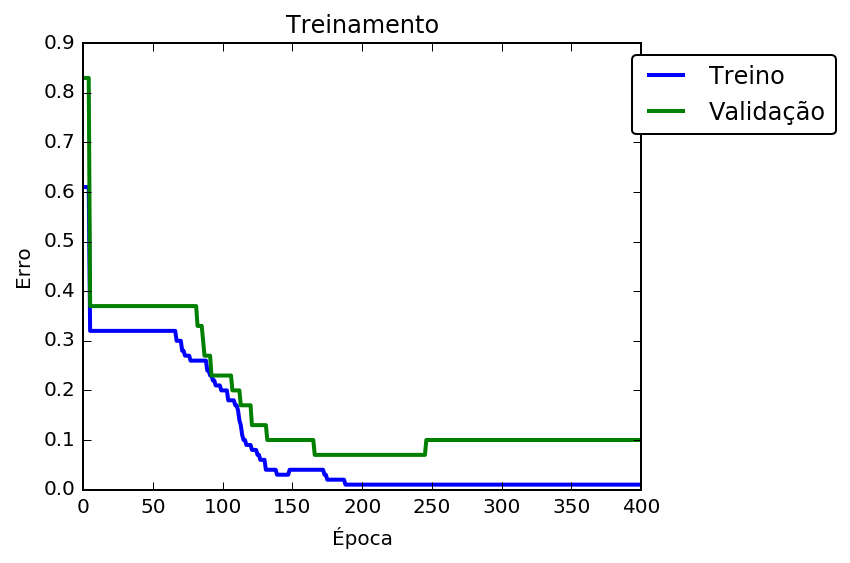

In [252]:
from sklearn.metrics import confusion_matrix, classification_report

print ("Resultados para os dados de teste:")
print ("- Matriz de confusão:")
print (confusion_matrix(y_test, out))
print ("- Relatório de classificação:")
print (classification_report(y_test,out))

# gerando gráfico de erros de treino e validação
# ploting support stuff
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig = plt.figure(figsize=(5,4))
plt.plot(range(epocas), errors['train'], label='Treino', linewidth=2.0)
plt.plot(range(epocas), errors['validation'], label='Validação', linewidth=2.0)
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(bbox_to_anchor=(1.37,1), fancybox=True);
plt.title('Treinamento');
plt.show()

# Submission

Submit your notebook files via our Piazza by October 26th, 2016.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [15]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.0.0 x86_64 i386 64bit
numpy 1.11.1
matplotlib 1.5.3
sklearn 0.17.1
Mon Oct 10 15:19:18 2016 BRT

In [16]:
# this code is here only for cosmetic reasons
from IPython.core.display import HTML
HTML(open('custom/custom.include', 'r').read())